# 🧠 Evaluating the Robustness of rStar: A Framework for Enhanced Reasoning in SLMs

Welcome to the notebook accompanying the project. This notebook walks you through the key components of the study, from data preparation to evaluation and results analysis.

---

## Disclaimer

Although we have made every effort to ensure reproducibility of the results, it's important to note that throughout the entire project work we were working on the fork of the original rStar project on the DTU HPC cluster with bash scripts and python scripts. The notebook thus serves just as a summary of the work done and the results obtained. 

## 📋 Table of Contents

1. [Import packages](#dependencies)
2. [Subsample GSM8K](#setup-and-dependencies)
3. [Template design](#template-design)
4. [Data Generation](#data-preparation)
5. [Running rStar](#running-rstar)
6. [New Action](#new-action)
7. [Results](#results)

## Import <a id="dependencies"></a>


In [ ]:
import json
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns
import sys

from matplotlib import rcParams
from matplotlib.colors import LinearSegmentedColormap

## Utils

In [ ]:
def file_exists(file):
    try:
        with open(file, 'r') as f:
            return True
    except FileNotFoundError:
        return False

rcParams['font.family'] = 'serif'

## Subsample the GSM8K data <a id="data-preparation"></a>

To avoid any inherent bias we would have when selecting the subsample manually we decided to randomly select 20 questions from the GSM8K dataset. We decided for 20 questions as more questions using the same training set up as in the original paper would have been time-wise too expensive. 

In [ ]:
filename = 'data/GSM8K/baseline.json'

with open('data/GSM8K/test_all.json') as f:
    data = json.load(f)

# select random 20 questions
random.seed(0)
random.shuffle(data)
data = data[:20]

# Write to file
if file_exists(filename):
    print(f'File {filename} already exists')
else:
    with open(filename, 'w') as f:
        json.dump(data, f, indent=4)

File data/GSM8K/baseline.json already exists


## Template design <a id="template-design"></a>

For each question, we created a template that would be used to generate the data. The template was created based on the original question and the answer. This enabled us to automatically generate variations of the questions and the correct answers on demand. For more details on the template design, please refer to the paper.

<img src="./assets/template1.png" />
<img src="./assets/template2.png" />

## Generate Variations of the Questions <a id="data-preparation"></a>

We first generated generic templates for all the selected questions. After that, each template was used to generate novel synthetic variations of the questions automatically. For more details please refer to the report.

In our project, for each question, we generated 5 variations

### Experiment 1: Names

In [12]:
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_1_names/variation_1.json --type name --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_1_names/variation_2.json --type name --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_1_names/variation_3.json --type name --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_1_names/variation_4.json --type name --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_1_names/variation_5.json --type name --num_variations 1

print("Variations for the Names Experiment 1 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_1_names")

Variations for the Names Experiment 1 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_1_names


### Experiment 2: Numbers

In [13]:
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_2_numbers/variation_1.json --type numbers --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_2_numbers/variation_2.json --type numbers --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_2_numbers/variation_3.json --type numbers --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_2_numbers/variation_4.json --type numbers --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_2_numbers/variation_5.json --type numbers --num_variations 1

print("Variations for the Names Experiment 1 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_2_numbers")

Variations for the Names Experiment 1 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_2_numbers


### Experiment 3: Names + Numbers

In [14]:
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_3_names_numbers/variation_1.json --type combined --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_3_names_numbers/variation_2.json --type combined --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_3_names_numbers/variation_3.json --type combined --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_3_names_numbers/variation_4.json --type combined --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_3_names_numbers/variation_5.json --type combined --num_variations 1

### Experiment 4: NoOps

Variations for this experiment were generated manually. For each question we came up with 5 variations by adding a new sentence to the question, that seems relevant to the question but should not change the answer. For more details please refer to the report.

### Experiment 5: Irrelevant Information

In [15]:
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant/variation_1.json --type irrelevant --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant/variation_2.json --type irrelevant --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant/variation_3.json --type irrelevant --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant/variation_4.json --type irrelevant --num_variations 1
!python variation_generator.py --input data/GSM8K/baseline.json --output data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant/variation_5.json --type irrelevant --num_variations 1

print("Variations for the Irrelevant Inforamtion Experiment 5 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant")

Variations for the Irrelevant Inforamtion Experiment 5 were generated. Saved to data/GSM8K/GSMSymbolic/variations/exp_5_irrelevant


## Run Generator <a id="running-rstar"></a>

We emailed the authors of the rStar project to get access to the exact code arguments that were used in the original paper. Our experiments were run with the same setup. All the experiments were run on the DTU HPC cluster where we submitted them as jobs each running for around 10 hours on average. The code is not intended to be run on a local machine as it requires a lot of computational resources.


> NOTE: The code below is intended to be run on the DTU HPC cluster.

In [16]:
ON_HPC = False 
python_path = sys.executable  # Current Python environment

### Experiment 1: Names

In [17]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):

        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_1_names/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_1_names_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 2: Numbers

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_2_numbers/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_2_numbers_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 3: Names + Numbers

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_3_names_numbers/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_3_names_numbers_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 4: NoOps

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_4_noops/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_4_noops_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 5: Irrelevant Information

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_4_noops/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_1_names_numbers_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

## Experiment with Action 6: Filter out irrelevant information <a id="new-action"></a>
In order to run this experiment, make sure you are on the `action 6 branch`.

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_generate.py \
            --dataset_name GSM8K \
            --test_json_filename GSMSymbolic/variations/exp_4_noops/variation_{variation_number} \
            --model_ckpt mistralai/Mistral-7B-v0.1 \
            --note exp_1_names_numbers_variation_{variation_number} \
            --num_rollouts 32 \
            --num_subquestions 5 \
            --num_a1_steps 5 \
            --disable_a5
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

## Run Discriminator

### Experiment 1: Names

In [23]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_discriminate.py \
            --model_ckpt microsoft/Phi-3-mini-4k-instruct \
            --root_dir run_outputs/GSM8K/Mistral-7B-v0.1/ExperimentsGenerator/exp_1_names_variation_{variation_number} \
            --dataset_name GSM8K \
            --note disc_exp_1_names_variation_{variation_number}
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 2 : Numbers

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_discriminate.py \
            --model_ckpt microsoft/Phi-3-mini-4k-instruct \
            --root_dir run_outputs/GSM8K/Mistral-7B-v0.1/ExperimentsGenerator/exp_2_numbers_variation_{variation_number} \
            --dataset_name GSM8K \
            --note disc_exp_2_numbers_variation_{variation_number}
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 3: Names + Numbers

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_discriminate.py \
            --model_ckpt microsoft/Phi-3-mini-4k-instruct \
            --root_dir run_outputs/GSM8K/Mistral-7B-v0.1/ExperimentsGenerator/exp_3_names_numbers_variation_{variation_number} \
            --dataset_name GSM8K \
            --note disc_exp_3_names_numbers_variation_{variation_number}
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 4: NoOps

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_discriminate.py \
            --model_ckpt microsoft/Phi-3-mini-4k-instruct \
            --root_dir run_outputs/GSM8K/Mistral-7B-v0.1/ExperimentsGenerator/exp_4_noops_variation_{variation_number} \
            --dataset_name GSM8K \
            --note disc_exp_4_noops_variation_{variation_number}
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

### Experiment 5: Irrelevant Information

In [ ]:
if ON_HPC:
    variations = 5

    for variation_number in range(1, variations + 1):
        command = f"""
        CUDA_VISIBLE_DEVICES=0 {python_path} run_src/do_discriminate.py \
            --model_ckpt microsoft/Phi-3-mini-4k-instruct \
            --root_dir run_outputs/GSM8K/Mistral-7B-v0.1/ExperimentsGenerator/exp_5_variation_{variation_number} \
            --dataset_name GSM8K \
            --note disc_exp_5_irrelevant_variation_{variation_number}
        """
        print(f"Executing for variation {variation_number}...")
        get_ipython().system(command)

## Results <a id="results"></a>

rStar by default generates a predefined folder structure with its file. To effectively evaluate the results, we moved manually all the relevant files from the rStar generated output to a new folder we named `Results`. The folder contains the following files:

- `baseline.json`
- `Irrelevant Information` folder with all corresponding json files for the different variations
- `Names` folder with all corresponding json files for the different variations
- `Names and Numbers` folder with all corresponding json files for the different variations
- `NoOps` folder with all corresponding json files for the different variations
- `Numbers` folder with all corresponding json files for the different variations


To run the following code cells you need to move the automatically generated files to the `Results` folder so that it is structured in the same way as above. The folder should be in the same directory as this notebook. 


### Read in the results

In [28]:
experiments_path = "Results"
baseline_path = "Results/baseline.json"

experiment_names = []
average_accuracies = []
majority_vote_accuracies = []
error_bars_accuracy = []
error_bars_majority_vote = []

for experiment in sorted(os.listdir(experiments_path)):
    experiment_path = os.path.join(experiments_path, experiment)
    if not os.path.isdir(experiment_path):
        continue

    accuracies = []
    majority_vote_accuracies_list = []

    results_path = os.path.join(experiment_path)
    for json_file in os.listdir(results_path):
        if json_file.endswith(".json"):
            json_file_path = os.path.join(results_path, json_file)
            with open(json_file_path, 'r') as file:
                data = json.load(file)
                
                if "accuracy" in data:
                    accuracies.append(data["accuracy"])
                if "majority_vote_accuracy" in data:
                    majority_vote_accuracies_list.append(data["majority_vote_accuracy"])

    
    if accuracies:
        mean_accuracy = np.mean(accuracies)
        std_accuracy = np.std(accuracies)
        n = len(accuracies)
        ci_accuracy = 1.96 * (std_accuracy / np.sqrt(n))
        average_accuracies.append(mean_accuracy)
        error_bars_accuracy.append([ci_accuracy])
    else:
        average_accuracies.append(0)
        error_bars_accuracy.append([0])

    
    if majority_vote_accuracies_list:
        mean_mv_accuracy = np.mean(majority_vote_accuracies_list)
        std_mv_accuracy = np.std(majority_vote_accuracies_list)
        n_mv = len(majority_vote_accuracies_list)
        ci_mv_accuracy = 1.96 * (std_mv_accuracy / np.sqrt(n_mv))
        majority_vote_accuracies.append(mean_mv_accuracy)
        error_bars_majority_vote.append([ci_mv_accuracy])
    else:
        majority_vote_accuracies.append(0)
        error_bars_majority_vote.append([0])

    experiment_names.append(experiment)

# baseline
with open(baseline_path, 'r') as file:
    data = json.load(file)
    baseline_accuracy = data["accuracy"]
    baseline_majority_vote_accuracy = data["majority_vote_accuracy"]

error_bars_accuracy = np.array(error_bars_accuracy).T  
error_bars_majority_vote = np.array(error_bars_majority_vote).T

### Fix order of the results

In [29]:
desired_order = ["Names", "Numbers", "Names and Numbers", "NoOps", "Irrelevant Information"]
ordered_indices = [experiment_names.index(name) for name in desired_order]

error_bars_accuracy = error_bars_accuracy[0]
error_bars_majority_vote = error_bars_majority_vote[0]

experiment_names = [experiment_names[i] for i in ordered_indices]
average_accuracies = [average_accuracies[i] for i in ordered_indices]
majority_vote_accuracies = [majority_vote_accuracies[i] for i in ordered_indices]
error_bars_accuracy = [error_bars_accuracy[i] for i in ordered_indices]
error_bars_majority_vote = [error_bars_majority_vote[i] for i in ordered_indices]

### 1) Plot of accuracy and majority vote accuracy across the different experiments

Here we display both the accuracies of pure rStar@maj (without discriminator) and then rStar with Discriminator (so the entire rStar flow) across the different experiments. To compare with baseline (i.e. questions without any alternations) we plot the baseline as horizontal lines for both rStar@maj and rStar with Discriminator.

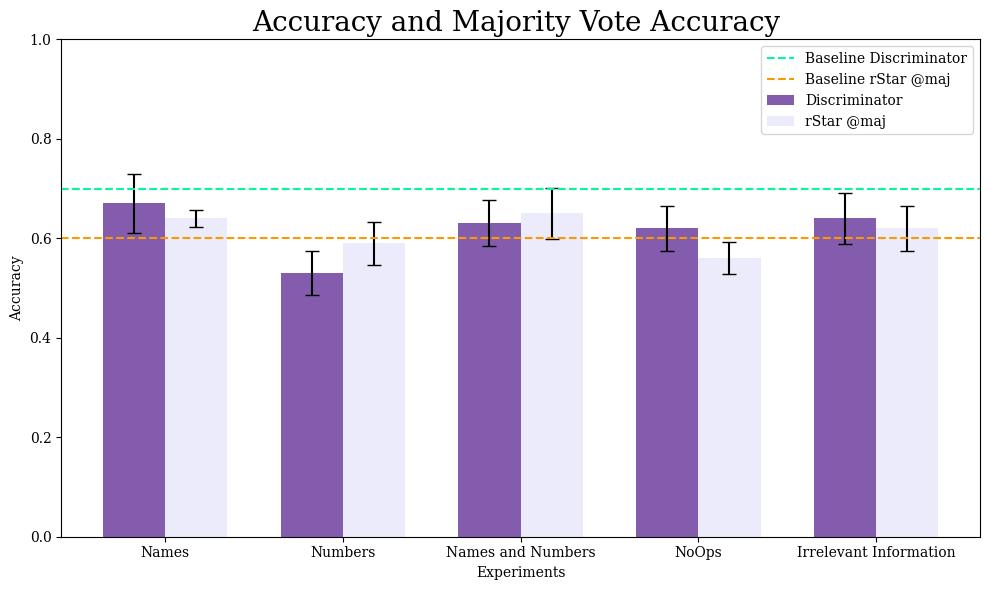

In [30]:
x_positions = np.arange(len(experiment_names))
width = 0.35 

plt.figure(figsize=(10, 6))  
plt.bar(x_positions - width/2, average_accuracies, width, yerr=error_bars_accuracy, 
        color='rebeccapurple', alpha=0.8, capsize=5, label='Discriminator')
plt.bar(x_positions + width/2, majority_vote_accuracies, width, yerr=error_bars_majority_vote, 
        color='lavender', alpha=0.8, capsize=5, label='rStar @maj')
plt.axhline(y=baseline_accuracy, color='#00FA9A', linestyle='--', linewidth=1.5, label='Baseline Discriminator')    
plt.axhline(y=baseline_majority_vote_accuracy, color='#FB9902', linestyle='--', linewidth=1.5, label='Baseline rStar @maj')
plt.xticks(x_positions, experiment_names, fontsize=10)
plt.xlabel("Experiments")
plt.ylabel("Accuracy")
plt.title("Accuracy and Majority Vote Accuracy ", fontsize=20)
plt.ylim(0, 1)  
plt.legend()
plt.tight_layout()

plt.savefig('fig1.svg', dpi=300, bbox_inches='tight')
plt.show()

### 2) Plot of the accuracy drop (compared to baseline) across the different experiments

Here we display the accuracy drop for rStar with Discriminator compared to the baseline. We also display relevant results for pure Mistral7B (i.e. our SLM used in the generator phase of rstar) obtained from the Apple paper we got inspired from (for more details please refer to the report).

### Calculate Differences

In [31]:
experiment_names = []
accuracy_differences = []

for experiment in sorted(os.listdir(experiments_path)):
    experiment_path = os.path.join(experiments_path, experiment)
    if not os.path.isdir(experiment_path):
        continue

    accuracies = []

    results_path = os.path.join(experiment_path)
    for json_file in os.listdir(results_path):
        if json_file.endswith(".json"):
            json_file_path = os.path.join(results_path, json_file)
            with open(json_file_path, 'r') as file:
                data = json.load(file)

                if "accuracy" in data:
                    accuracies.append(data["accuracy"])

   
    if accuracies:
        average_accuracy = np.mean(accuracies)
        accuracy_difference = (average_accuracy - baseline_accuracy)*100
        accuracy_differences.append(accuracy_difference)
        experiment_names.append(experiment)  

experiment_names.append("Mistral-7b-v0.1@GSM-Symbolic [1]")
accuracy_differences.append(-3.4 )  

experiment_names.append("Mistral-7b-v0.1@GSM-NoOp [1]")
accuracy_differences.append(-28.3 ) 

### Plot differences in accuracy

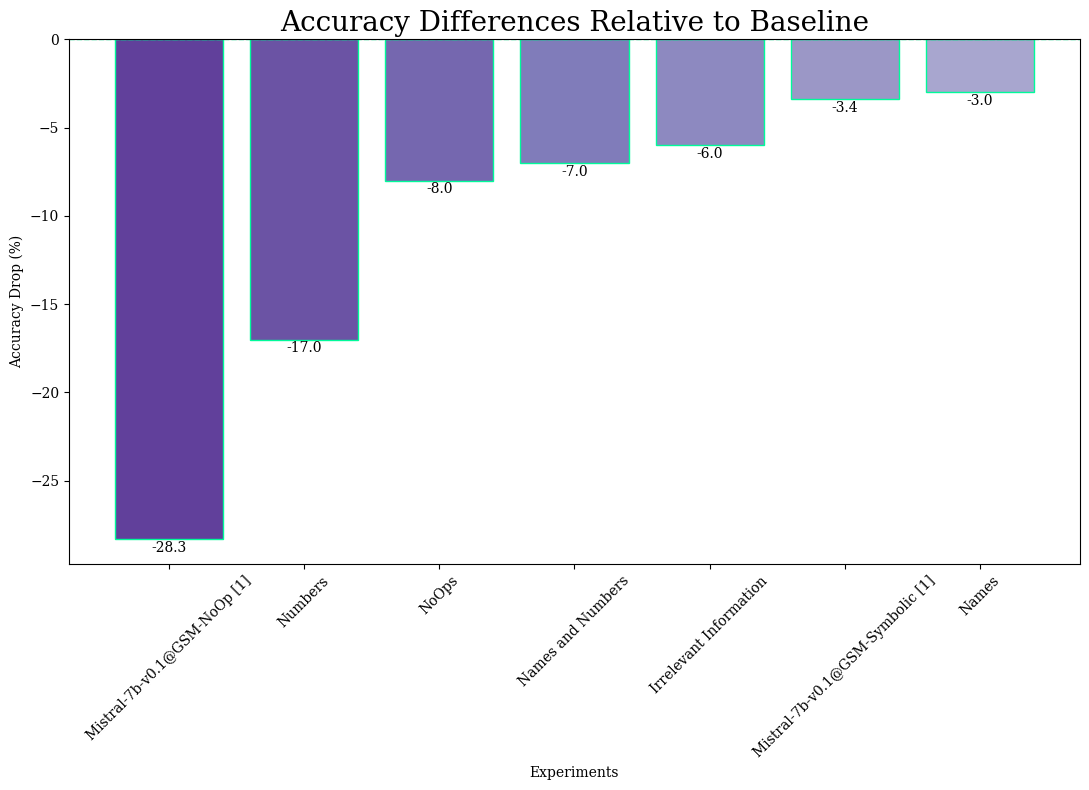

In [32]:
data = list(zip(experiment_names, accuracy_differences))
data_sorted = sorted(data, key=lambda x: x[1], reverse=False)  

experiment_names, accuracy_differences = zip(*data_sorted)

experiment_names = list(experiment_names)
accuracy_differences = list(accuracy_differences)


num_bars = len(experiment_names)
colors = [cm.Purples(0.8 - i * 0.4 / num_bars) for i in range(num_bars)]  


plt.figure(figsize=(11, 8))
bars = plt.bar(experiment_names, accuracy_differences, color=colors, edgecolor='#00FA9A')
plt.axhline(0, color='#00FA9A', linestyle='--', linewidth=1) 
plt.xticks(rotation=45, fontsize=10)
plt.ylabel("Accuracy Drop (%)")
plt.xlabel("Experiments")
plt.title("Accuracy Differences Relative to Baseline", fontsize=20)


for bar, diff in zip(bars, accuracy_differences):
    y_val = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        y_val - 0.9 if y_val < 0 else y_val + 0.9, 
        f"{diff:.1f}",
        ha='center',
        va='bottom' if y_val < 0 else 'top',
        fontsize=10,
        color='black'
    )

plt.tight_layout()

plt.savefig("fig2.svg", format="svg")
plt.show()

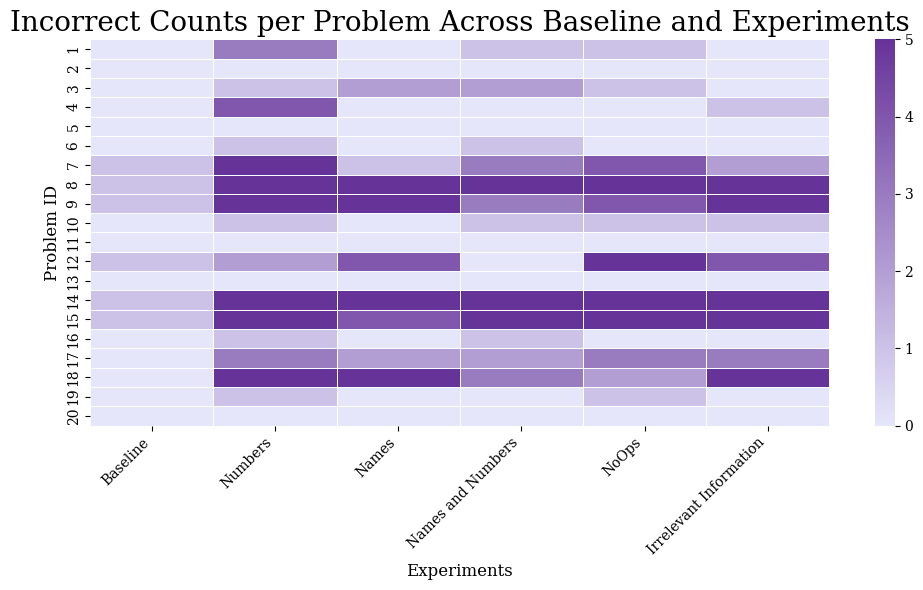

In [33]:
csv_path = "Po_session/Results/Results/aggregated_incorrect_counts.csv"

df = pd.read_csv(csv_path)

df = df.set_index("problem_id")

colors = ["lavender", "rebeccapurple"]
cmap = LinearSegmentedColormap.from_list("lavender_rebecca", colors, N=256)

plt.figure(figsize=(10, 6))
sns.heatmap(df, 
            annot=False,                   cmap=cmap, 
            cbar=True, 
            linewidths=0.5)

plt.title("Incorrect Counts per Problem Across Baseline and Experiments", fontsize=20)
plt.ylabel("Problem ID", fontsize=12)
plt.xlabel("Experiments", fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.tight_layout()
plt.savefig("total_wrong_counts_2.svg", dpi=300, bbox_inches='tight')
